In [10]:
import rootpy.ROOT as ROOT

# file containg final pass for QA
f = ROOT.TFile( "/Users/danielbrandenburg/bnl/local/data/Run12/cuau/pre_upload_final.root", "READ" )
c = ROOT.TCanvas( "c", "c", 1000, 500 )
ROOT.gStyle.SetOptStat( 0 )


In [11]:
# load the functions for making the plots
%run 'libTofCalib.ipynb'

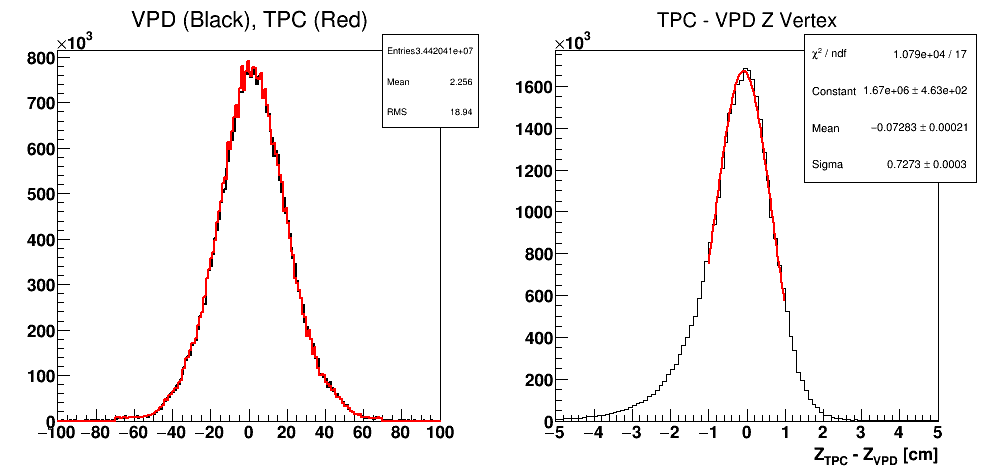

In [13]:
reportVPD( f )

* The mean should be less than ~10 mm from being centered at 0  
* sigma varies depending on energy and species
    * Run12 CuAu sigma = 0.72

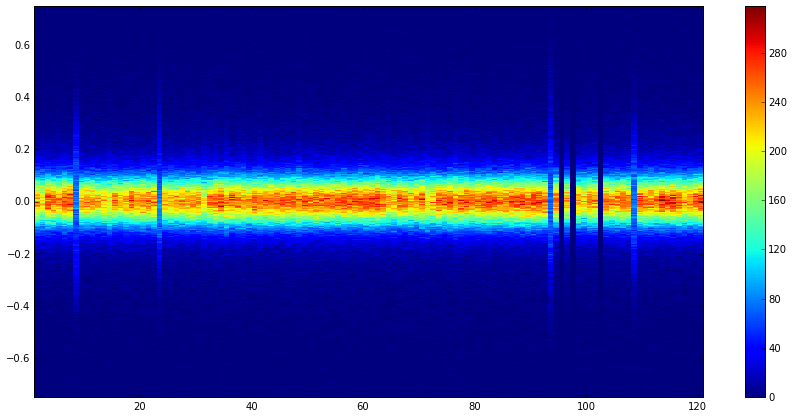

In [14]:
from rootpy.plotting import root2matplotlib as rplt
from matplotlib import pyplot as plt
%matplotlib inline
hRes = f.BTofTimeRes_vs_TrayNarrow
fig = plt.figure(1, figsize=(15, 7))
shown = rplt.imshow( hRes)
fig.colorbar(shown)
plt.show()

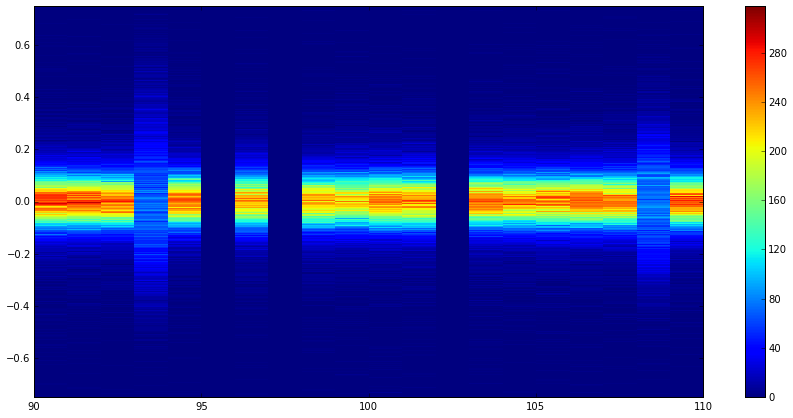

In [31]:
hRes = f.BTofTimeRes_vs_TrayNarrow
fig = plt.figure(1, figsize=(15, 7))
plt.xlim([90, 110])
shown = rplt.imshow( hRes)
fig.colorbar(shown)
plt.show()

Remove bad/missing trays from the status table
- Removing 95, 97, 102

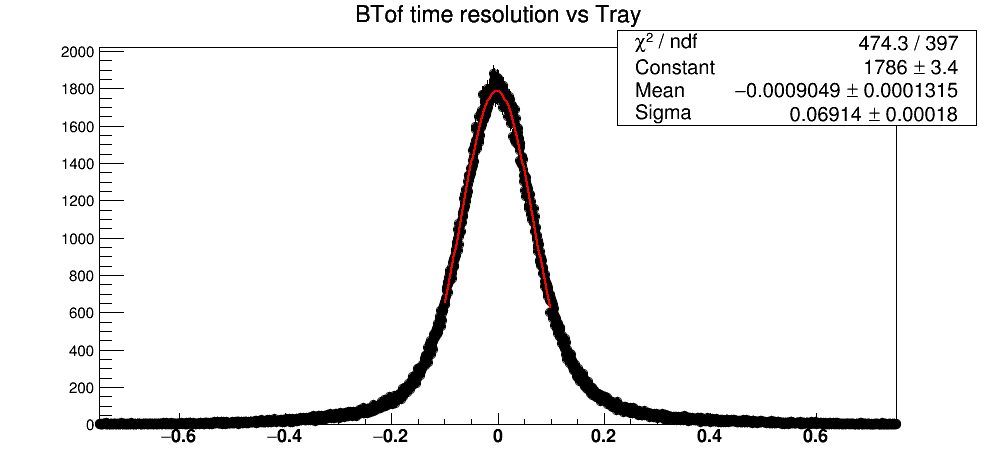

In [41]:
c.Clear()
h = f.BTofTimeRes_vs_TrayNarrow.ProjectionY()
h.Fit( "gaus", "", "", -.1, .1 )
h.SetMarkerStyle(8)
h.Draw("p")
c